## Telco Customer Churn

## By Hossam Fid
### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

__The data set includes information about:__

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents



#### what is custmoer churn ??

its a technique which u can detect the customers who are likely to cancel thier subscribtion or subscribe 

#### why ??
customer churn is the loss of clients and customers, tele companies use it to 
rate as one of their key business metrics cuz recovered long-term customers can 
be worth much more to a company than newly recruited clients

#### how ??

- upsampling to existing customers 
- acuring new customers 
- increase customer retention 

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample  
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
print('modules are imported ')

modules are imported 


In [2]:
os.chdir('D:\Data\Developer Student Club\Machine')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
# lets see our cols unique values 
for col in df.columns :
    print(f'Column : {col} \n')
    print(df[col].unique(),'\n')
    

Column : customerID 

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

Column : gender 

['Female' 'Male'] 

Column : SeniorCitizen 

[0 1] 

Column : Partner 

['Yes' 'No'] 

Column : Dependents 

['No' 'Yes'] 

Column : tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

Column : PhoneService 

['No' 'Yes'] 

Column : MultipleLines 

['No phone service' 'No' 'Yes'] 

Column : InternetService 

['DSL' 'Fiber optic' 'No'] 

Column : OnlineSecurity 

['No' 'Yes' 'No internet service'] 

Column : OnlineBackup 

['Yes' 'No' 'No internet service'] 

Column : DeviceProtection 

['No' 'Yes' 'No internet service'] 

Column : TechSupport 

['No' 'Yes' 'No internet service'] 

Column : StreamingTV 

['No' 'Yes' 'No internet service'] 

Column : StreamingMovies 

['No' 'Yes' 'No

## Data cleaning & Preprocessing 
- check for NaN values 
- fill totalCharges col with => 0
- check for duplicated values
- check for outliers
- convert cols names to lowerCase 
- drop customerID 
- change seniorcitizen , totalcharges  data types
- totalCHarges col ' ' empty string value => np.nan
- many cols have 'No internet service' value => 'no'
- churn col values => 0, 1 
- senior  tenure citizen outlier min value detected (doubted)
- warning senior citizen STD is close to zero maybe its not good to use in our model as a feature (doubted)
- scale numeric features  
- categroical labelEncoding 
- upsamling dependent variable 


In [9]:
# check for NaN values 
# df.isnull().values.any()
#df.isnull().any()
# np.all(np.isfinite(df))
#np.any(np.isnan(df))


#drop NaN values 
#df = df[df['totalchrages'].notnull()].reset_index()  => Detect non-missing values for an array-like object.


df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# fill missing values with zero
#df['totalcharges'].fillna(0,axis=0 , inplace=True)

df.fillna(value = 0, inplace = True)
#check 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# covery cols names to lowerCase 
df.columns = df.columns.str.lower()
#check 
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [12]:
# double check for Nan values on totalCharges col 
count = 0
for x in df.totalcharges.index:
    try :
        float(df.totalcharges[x])
    except:
    
        print(f'check at index {x}')
        count+=1
print(count)


check at index 488
check at index 753
check at index 936
check at index 1082
check at index 1340
check at index 3331
check at index 3826
check at index 4380
check at index 5218
check at index 6670
check at index 6754
11


In [13]:
# check for duplicates 
# count duplicates on entire dataframe
#len(df)-len(df.drop_duplicates())
df.duplicated(subset=None, keep='first').sum()


0

In [14]:
# drop duplicates 
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [15]:
#check 
len(df) - len(df.drop_duplicates())

0

In [16]:
# check for outliers 
# outliers detection techniques 
# data points fall outside the 3 standard deviation , we can use Zscore and if the Zscore fall outside of the 2 STD 
# data points fall below 1st quartile and above 3rd quartile 
# using scatter plots 
# using box plots 

########Z_score
#outliers = list()
#
#def out_detection(df):
#    
#    threshold = # value 
#    mean = np.mean(df)
#    std = np.std(df)
#    
#    for i in df:
#        z_score = (i - mean) / std
#        if np.abs(z_score) > threshold :    
#            outliers.append(i)
#    return outliers 


####### IQR
#sort values
#calcaulate Q1 and Q3 
#find the IQR
#find the lower bound (Q1*1.5) and the upper bound (Q3*1.5) 
#anything that lies outside the bounds is an outliers


#sorted(dataset)
#q1 , q3 = np.percentile(dataset,[25,75])
#iqr = q3 - q1
#lower_bound = q1 - (1.5 * iqr)
#upper_bound = q3  - (1.5 * iqr)

In [17]:
# convert seriorCitizen col to numeric 
df['seniorcitizen'] = df['seniorcitizen'].astype('object')
#check 
df.dtypes['seniorcitizen']

dtype('O')

In [18]:
# convert totalCharge col to numeric 
#df['totalcharges'] = pd.to_numeric(df['totalcharges'])
# we got that error  Unable to parse string " " at position 488
# lets check that col index
df['totalcharges'].iloc[488]

' '

In [19]:
# its an empty strting 
# replace empty string with np.NaN

df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)

In [20]:
# let convert it back 
df['totalcharges'] = pd.to_numeric(df['totalcharges'])
# check
df.dtypes['totalcharges']

dtype('float64')

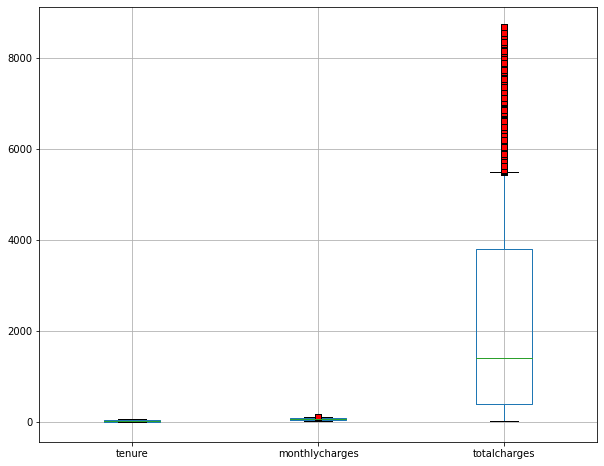

In [21]:
numeric_features = df.select_dtypes(include=np.number)

plt.figure(figsize = (10,8))
#plt.subplots(figsize = (10,15))
red_square = dict(markerfacecolor='r', marker='s')
numeric_features.boxplot( flierprops=red_square, vert=True, whis=0.5)
plt.show()



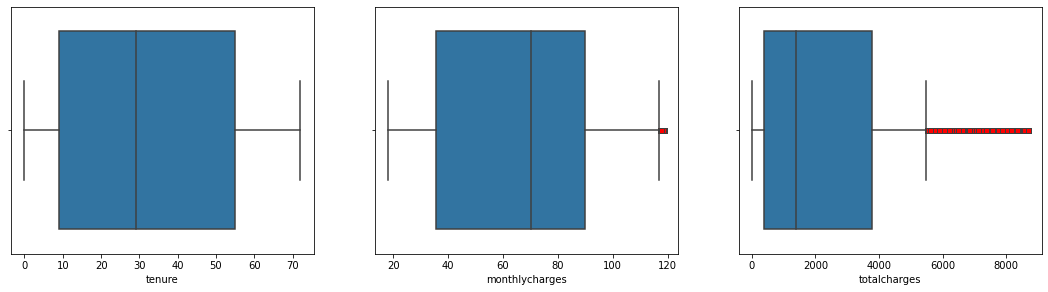

In [22]:
plt.figure(figsize=(25,10))
for i,col in enumerate(numeric_features):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[col],flierprops=red_square, whis=0.5)

In [23]:
# drop the customerID col 
df.drop('customerid', axis = 1, inplace =True)
# check 
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# 'convert No internet service' value to 'No' 

#for col in df.columns :
#    for i in col :
#        if 'No internet service' in df[col].values:
#            i = i.replace('No internet service' , 'No')
#        scratch code ####

# df['onlinesecurity'] = df['onlinesecurity'].apply(lambda x : x.replace('No online service','No'))
    #### scratch code 

convert_cols  = ['onlinesecurity','onlinebackup','deviceprotection','techsupport',
                 'multiplelines','streamingtv','streamingmovies']
for i in df[convert_cols]:
    df[i].replace('No internet service', 'No', inplace =True)

In [25]:
#check
df['onlinesecurity'].value_counts()

No     5024
Yes    2019
Name: onlinesecurity, dtype: int64

In [26]:
# replace churn values with 1 & 0 
df['churn'] = df['churn'].replace('Yes', 1).replace('No', 0)


In [27]:
#check 
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

## EDA

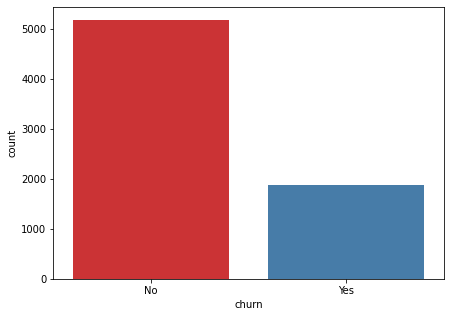

0    5174
1    1869
Name: churn, dtype: int64

In [28]:
# TOTAL CHURN 
plt.figure(figsize=(7,5))
sns.countplot(x= 'churn', data = df,palette='Set1')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.show()
df['churn'].value_counts()

Whether the customer churned or not we can observe that most of cust. still remaining with us company 

In [29]:
# CHURN RATE WRT GENDER  

gender = df.groupby('gender')[['churn']].mean()
gender = gender.reset_index()
gender.rename(columns = {'churn':'total'}, inplace = True)
gender

,gender,total
0,Female,0.269209
1,Male,0.261603


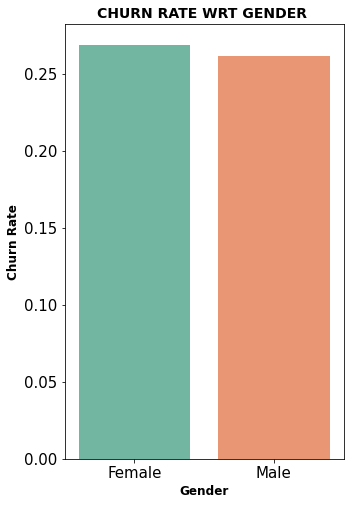

In [30]:
# lets plot this 
plt.figure(figsize=(5,8))
sns.barplot(x='gender' , y='total', data=gender,palette='Set2')
plt.tick_params(labelsize = 15)
plt.xlabel('Gender', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT GENDER ', fontsize = 14 , fontweight='bold')
plt.show()

Churn rate for females customers is slightly higher than males chustomers rate , but i think we can ignore 

In [31]:
# CHURN RATE WRT TENURE 

tenure_no = df[df['churn'] == 0]
tenure_no

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [32]:
tenure_yes = df[df['churn'] == 1]
tenure_yes

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1


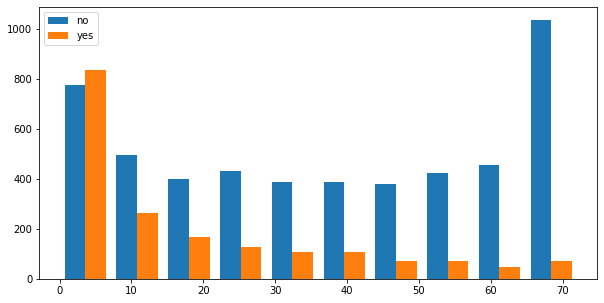

In [33]:
plt.figure(figsize=(10,5))
plt.hist([tenure_no['tenure'],tenure_yes['tenure']], label= ['no','yes'])
plt.legend()
plt.show()

In [34]:
# CHURN RATE WRT TENURE 

tenure = df.groupby('tenure')[['churn']].mean()
tenure = tenure.reset_index()
tenure.rename(columns = {'churn':'total'}, inplace = True)
tenure

,tenure,total
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


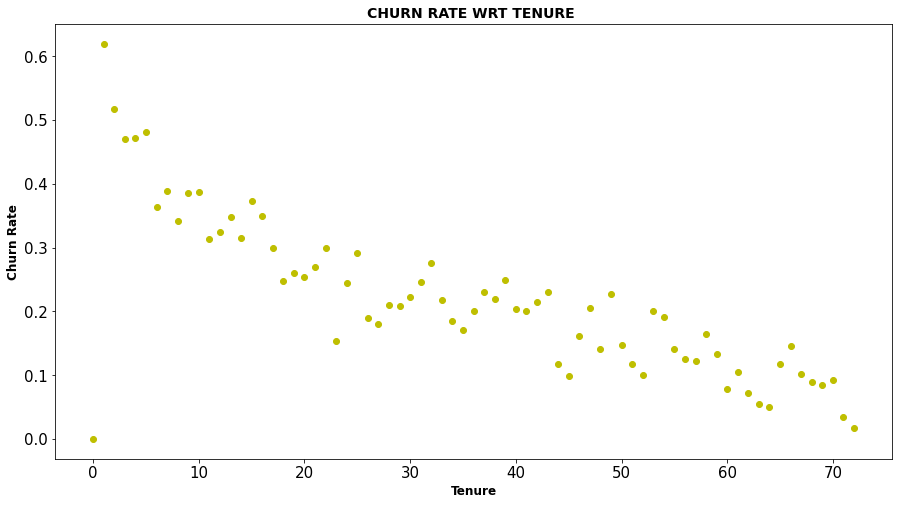

In [74]:
# lets plot this
plt.figure(figsize=(15,8))
plt.scatter(x='tenure' , y='total', data=tenure, c='y')
plt.tick_params(labelsize = 15)
plt.xlabel('Tenure', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT TENURE ', fontsize = 14 , fontweight='bold')
plt.show()

its negative correlation , higher tenure meets lower churn rate

In [36]:
# CHURN RATE WRT TECH SUPPORT 
support = df.groupby('techsupport')[['churn']].mean()
support = support.reset_index()
support.rename(columns = {'churn':'total'}, inplace = True)
support

,techsupport,total
0,No,0.311862
1,Yes,0.151663


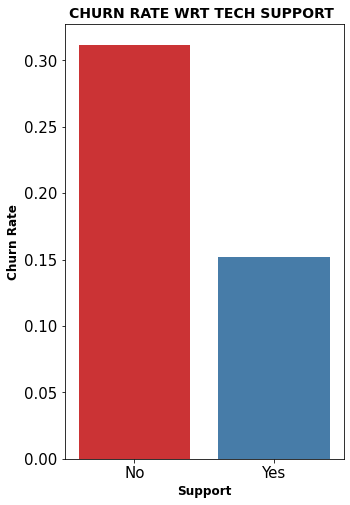

In [37]:
# lets plot this 
plt.figure(figsize=(5,8))
sns.barplot(x='techsupport' , y='total', data=support,palette='Set1')
plt.tick_params(labelsize = 15)
plt.xlabel('Support', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT TECH SUPPORT ', fontsize = 14 , fontweight='bold')
plt.show()

more and more customers that don't call customer support are more likely to churn 

In [38]:
# CHURN RATE WRT INTERNET 

internet = df.groupby('internetservice')[['churn']].mean()
internet = internet.reset_index()
internet.rename(columns={'internetservice':'internet', 'churn':'total'}, inplace =True)
internet

,internet,total
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


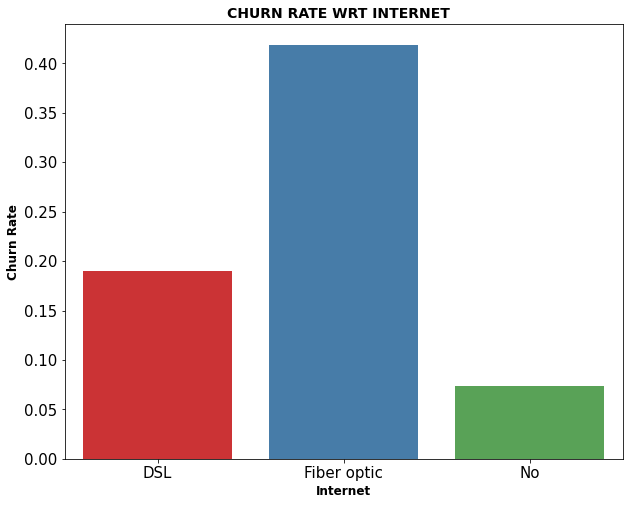

In [39]:
# lets plot this 
plt.figure(figsize=(10,8))
sns.barplot(x='internet' , y='total', data=internet,palette='Set1')
plt.tick_params(labelsize = 15)
plt.xlabel('Internet', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT INTERNET  ', fontsize = 14 , fontweight='bold')
plt.show()

Customers who use Fiber optics cables are more likey to churn

In [40]:
#CHRN RATE WRT CONTRACT DURATION
contract = df.groupby('contract')[['churn']].mean()
contract = contract.reset_index()
contract.rename(columns={ 'churn':'total'}, inplace =True)

contract

,contract,total
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


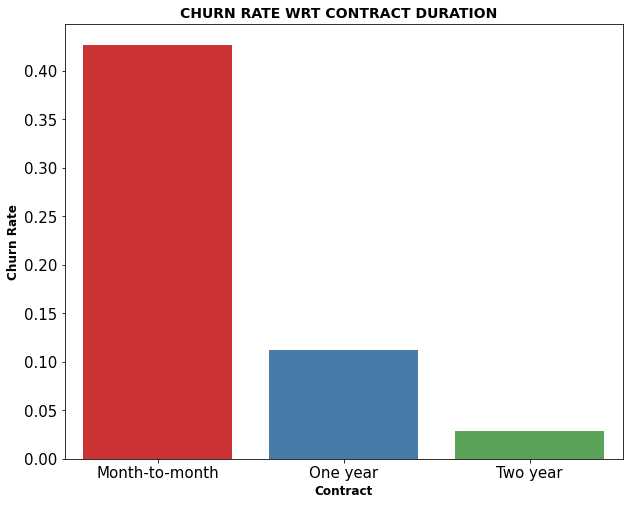

In [41]:
# lets plot this 
plt.figure(figsize=(10,8))
sns.barplot(x='contract' , y='total', data=contract,palette='Set1')
plt.tick_params(labelsize = 15)
plt.xlabel('Contract', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT CONTRACT DURATION  ', fontsize = 14 , fontweight='bold')
plt.show()

Customers who use monthly charging contract are more likely to churn more than others 

In [42]:
#CHRN RATE WRT PAYMENT
payment = df.groupby('paymentmethod')[['churn']].mean()
payment = payment.reset_index()
payment.rename(columns={'paymentmethod':'payment', 'churn':'total'}, inplace =True)

payment

,payment,total
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431
2,Electronic check,0.452854
3,Mailed check,0.191067


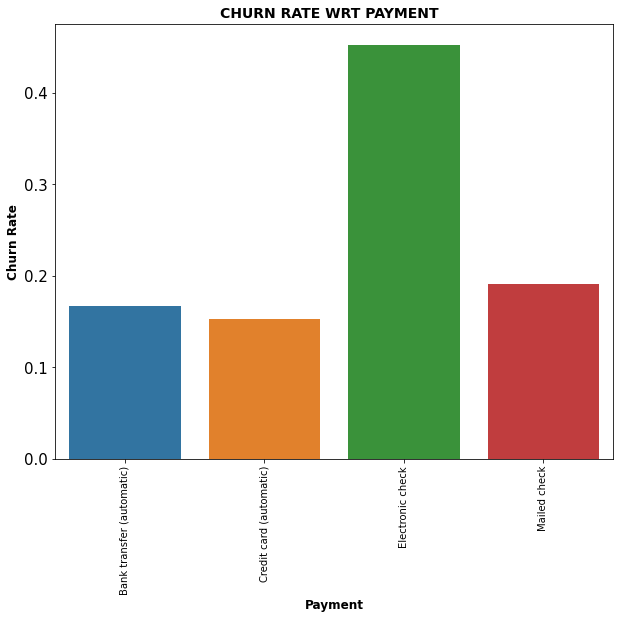

In [43]:
# lets plot this 
plt.figure(figsize=(10,8))
sns.barplot(x='payment' , y='total', data=payment)
plt.tick_params(labelsize = 15)
plt.xlabel('Payment', fontsize = 12 , fontweight='bold')
plt.ylabel('Churn Rate', fontsize = 12 , fontweight='bold')
plt.title('CHURN RATE WRT PAYMENT  ', fontsize = 14 , fontweight='bold')
plt.xticks(rotation = 'vertical',size = 10)
plt.show()

Customers who pay using electronic checks are more likey tto churn 

### Conclusion
- Whether the customer churned or not we can observe that most of cust. still remaining with us company
- the churn rate for females customers is slightly higher than males customers rate, but I think we can ignore
- its negative correlation, higher tenure meets lower churn rate
- more and more customers that don't call customer support are more likely to churn
- Customers who use Fiber optics cables are more likely to churn
- Customers who use monthly charging contract are more likely to churn more than others
- Customers who pay using electronic checks are more likely to churn


## Modeling 

### Data preprocessing (now we have 3 tasks)
- convert our categories into numeric thru => one hot enconding 
- perfrom scaling on our numeric features thru => standrdScaler
- upsampling our target feature thru => sampling with replacement(resample)

In [44]:
# one hot encoding cate. to numeric 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [45]:
# replace No phone service value with No
df['multiplelines'] = df['multiplelines'].apply(lambda x:x.replace('No phone service', 'No'))

In [46]:
df['multiplelines'].unique()


array(['No', 'Yes'], dtype=object)

In [47]:
object_features = df.select_dtypes(exclude=np.number)
len(object_features.columns)


16

In [48]:
object_features.multiplelines.unique()



array(['No', 'Yes'], dtype=object)

In [49]:
# get  correlations for  each features in ddataframe

#sns.set(font_scale=1.5)
#corrmat = df_unsampling.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(30,30))
#
## Plot heatmap
#correlation = sns.heatmap(df_unsampling[top_corr_features].corr(),annot=True,fmt=".3f",cmap='Blues')

In [50]:
# lets look at multiplelines before running get_dummies (go back)
df = pd.get_dummies(df, columns = object_features.columns )

In [51]:
#check 
df.head()
#fix multiplelines col values Yes or No Dome !!!


,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [52]:
# now lets scale our numeric features using standardScaler 
cols_to_scale = ['tenure', 'monthlycharges','totalcharges']
sc = StandardScaler()
df[cols_to_scale] = sc.fit_transform(df[cols_to_scale])


In [53]:
#check 
df.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0.066327,-0.259629,-0.173740,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.959649,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0.514251,-0.746535,-0.195248,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,-1.236724,0.197365,-0.940457,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [54]:
# upsamling to our target feature 
# An imbalanced dataset target would lead to a biased model after training
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [55]:
df['churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [56]:
# duplicating observations from the minority class using sampling with replacement 
# seperate class into 2 portion minority and majoity

df_minority = df[df['churn'] == 1]
df_majority = df[df['churn'] == 0]


# upsample minority class

df_upsamling = resample (df_minority, replace =True , 
                         n_samples = 5174, random_state = 1)

# coombine majority class with unsampled minority class that we did resampling on (new one) 
df_unsampling = pd.concat([df_majority, df_upsamling])



In [57]:
#check 
df_unsampling['churn'].value_counts()

1    5174
0    5174
Name: churn, dtype: int64

In [58]:
df_unsampling['churn'].value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [59]:
# lets see our dataframe final look 
df_unsampling.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0.066327,-0.259629,-0.173740,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,0.514251,-0.746535,-0.195248,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
6,-0.422317,0.808907,-0.147313,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
7,-0.910961,-1.163647,-0.874169,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [60]:
df_unsampling.dropna(axis=0, how='any',inplace=True)

In [61]:
df_unsampling = df_unsampling[df_unsampling['totalcharges'].notnull()].reset_index()

In [62]:
df_unsampling.isna().any()

index                                      False
tenure                                     False
monthlycharges                             False
totalcharges                               False
churn                                      False
gender_Female                              False
gender_Male                                False
seniorcitizen_0                            False
seniorcitizen_1                            False
partner_No                                 False
partner_Yes                                False
dependents_No                              False
dependents_Yes                             False
phoneservice_No                            False
phoneservice_Yes                           False
multiplelines_No                           False
multiplelines_Yes                          False
internetservice_DSL                        False
internetservice_Fiber optic                False
internetservice_No                         False
onlinesecurity_No   

In [63]:
#start modeling 
# specify our X,y 

X = df_unsampling.drop(columns = 'churn', axis = 1)
y = df_unsampling['churn']

In [64]:
# split our dataset into train and test sets 

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25 ,random_state= 1)

In [65]:
X_train.head()

,index,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_Yes,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
7954,418,-0.422317,0.616138,-0.192976,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
758,1024,0.188489,0.185733,0.118944,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
7022,573,0.962175,1.181149,1.469661,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0
8266,1132,-0.870241,1.305784,-0.507211,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0
4820,6570,-1.155283,-1.183588,-0.958811,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [66]:
y_train[:10]

7954    1
758     0
7022    1
8266    1
4820    0
9311    1
3350    0
1616    0
9660    1
3975    0
Name: churn, dtype: int64

In [67]:
# now lets use these algorithms for classification 
#LogisticRegression
#DecisionTreeClassifier
#RandomForestClassifier
#KNeighborsClassifier
#SVC

# using GridSeachCV for parameter Tunning and cv(cross validation) tod  determine the best model with the best parameters 

model_params = {
    
    'LogisticRegression':{
        'model':LogisticRegression(solver='sag'),
        'params':{
            'penalty': ['l2', 'elasticnet'], 
            
            'C' : [1,5,10,20,30]
        }
        
    },
    
    'DecisionTree':{
        'model' : DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy']
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators' :[20,50,100,200,300]
        }
    },
    
    'KNeighbors':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[5,10,15,20,25]
        }
    } ,
     'SVM':{
         'model':SVC(),
         'params':{
            'kernel':['lienar','rbf','sigmoid'],
            'C':[5,10,20,30,40,50]
         }
     }
}



In [68]:
# use gridSearch
# param_grid : dict or list of dictionaries Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries
# cv :int, cross-validation generator or an iterable, default=None Determines the cross-validation splitting strategy.

scores = list()

for model_name , model_p  in model_params.items():
    model_selection = GridSearchCV(estimator=model_p['model'],
                                  param_grid = model_p['params'],
                                  cv = 5,
                                  return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

In [69]:
score_df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [70]:
#RandomizedSearchCV
#n_iter = 
score_df

,model,best_score,best_params
0,LogisticRegression,0.535560,"{'C': 30, 'penalty': 'l2'}"
1,DecisionTree,0.603752,{'criterion': 'gini'}
2,RandomForest,0.748573,{'n_estimators': 20}
3,KNeighbors,0.396441,{'n_neighbors': 5}
4,SVM,0.548137,"{'C': 20, 'kernel': 'sigmoid'}"


RandomForest model gives us the best score ,
__Note__ its not the best hyperparameter tunning and maybe its not the best estimator 

Confusion Matrix for SVM


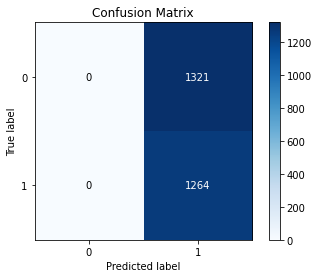

Classification Report for SVM  :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00      1321
           1       0.49      1.00      0.66      1264

    accuracy                           0.49      2585
   macro avg       0.24      0.50      0.33      2585
weighted avg       0.24      0.49      0.32      2585



In [71]:
# not compeleted , still working on 
# just for testing purposes 
svmc = SVC( C = 20)
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)


###model evaluation 
print("Confusion Matrix for SVM")
plot_confusion_matrix(y_test, y_pred)
plt.show()

print("Classification Report for SVM  :\n ",
      classification_report(y_test,y_pred,
                                  ))  #  target_names=[0,1]